<a href="https://colab.research.google.com/github/jeonjnh/python_colab_exercise/blob/main/Value_at_Risk_Monte_Carlo_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Value Risk
https://www.youtube.com/watch?v=X8aNFXJEENs

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set time from to a certain number of years

In [ ]:
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)


# Create a list of tickers

In [ ]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

# Download the daily adjusted close prices for the tickers

In [ ]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
  data = yf.download(ticker, start= startDate, end= endDate)
  adj_close_df[ticker] = data['Adj Close']

adj_close_df
adj_close_df.to_excel(excel_writer="adj_close.xlsx")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-09-02,65.360001,65.699997,64.050003,64.349998,48.433620,1421300
2008-09-03,64.330002,64.559998,63.750000,64.230003,48.343323,1210200
2008-09-04,63.790001,63.840000,62.259998,62.259998,46.860580,1554300
2008-09-05,61.980000,62.740002,61.290001,62.630001,47.139050,3154000
2008-09-08,64.389999,64.419998,62.750000,63.720001,47.959457,1530800
...,...,...,...,...,...,...
2023-08-22,219.220001,219.220001,217.380005,217.679993,217.679993,2892300
2023-08-23,218.080002,220.399994,218.080002,220.059998,220.059998,2560200
2023-08-24,220.699997,221.139999,217.080002,217.110001,217.110001,3099400


# Calculating Daily Log Returns

In [ ]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()
log_returns

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2008-09-03,-0.000860,0.001312,-0.003922,-0.009485,-0.001866
2008-09-04,-0.030569,0.000523,-0.006358,-0.032893,-0.031151
2008-09-05,0.003140,0.000785,0.007498,-0.004822,0.005925
2008-09-08,0.020445,0.007037,-0.001521,-0.001843,0.017254
2008-09-09,-0.030137,0.001817,-0.030514,-0.021441,-0.035298
...,...,...,...,...,...
2023-08-22,-0.002712,0.001275,0.001648,-0.001430,-0.002661
2023-08-23,0.011076,0.009022,0.010113,0.015646,0.010874
2023-08-24,-0.013956,-0.002389,-0.000225,-0.021607,-0.013496


# Defining Functions to Calculate Portfolio Expected Return and Standard Deviation

In [ ]:
# Creating function that will be used to calculate portfolio expexted return
# We assuming that future returns are based on past returns, which is not a reliable assumption.

def expected_return(weight, log_returns):
  return np.sum(log_returns.mean()*weight)

# Create a function that will be used to calculate portfolio standard deviation

def standard_deviation(weight, cov_matrix):
  variance = weight.T @ cov_matrix @ weight
  return np.sqrt(variance)

# Creating a Covariance Matrix

In [ ]:
# Creating a covariance matrix for all the securities
cov_matrix = log_returns.cov()
cov_matrix

,SPY,BND,GLD,QQQ,VTI
SPY,1.673273e-04,1.766281e-07,0.000007,1.713781e-04,1.680127e-04
BND,1.766281e-07,1.073838e-05,0.000009,-1.161965e-07,1.110083e-07
GLD,7.288357e-06,8.730038e-06,0.000118,6.291247e-06,8.472505e-06
QQQ,1.713781e-04,-1.161965e-07,0.000006,2.044060e-04,1.734522e-04
VTI,1.680127e-04,1.110083e-07,0.000008,1.734522e-04,1.707881e-04


# Calculating Portfolio Expected Return and Standard Deviation

In [ ]:
# Creating an equally weighted portfolio and find total portfolio expected return and standard deviation

portfolio_value = 1000000
weights = np.array([1/len(tickers)] * len(tickers))
print(weights)
portfolio_expected_return = expected_return(weights, log_returns)
print(portfolio_expected_return)
portfolio_standard_deviation = standard_deviation(weights, cov_matrix)
print(portfolio_standard_deviation)

[0.2 0.2 0.2 0.2 0.2]
0.0003412169311596019
0.00838657412112093


# Defining Functions for Monte Carlo Simulation

In [ ]:
def random_z_score():
  return np.random.normal(0,1)

# Create a function to calculate scnarioGainLoss
days = 20

def scenario_gain_loss(portfolio_value, portfoilo_std_dev, z_score, days):
  return portfolio_value * portfolio_expected_return * days + portfolio_value * portfoilo_std_dev * z_score * np.sqrt(days)

# Running Monte Carlo Simulation

In [ ]:
# Run 10000 simulation
simulations = 10000
scenarioReturn = []

for i in range(simulations):
  z_score = random_z_score()
  scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_standard_deviation, z_score, days))


# Calculating Value at Risk (VaR)

In [ ]:
# Specifiy a confidence interval and calculate the value at risk(VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1-confidence_interval))
print(VaR)

81125.00632542449


# Plotting the Results

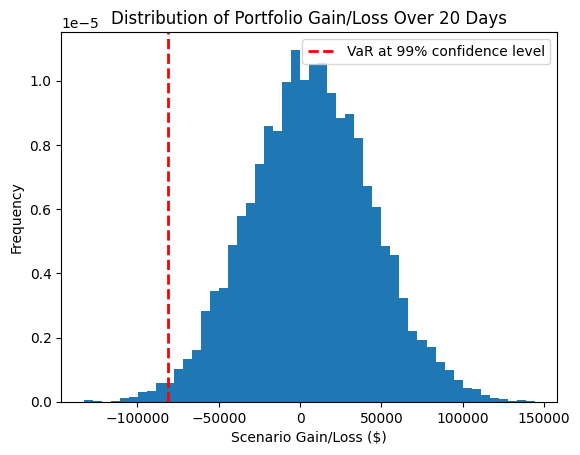

In [ ]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()